HINEILL DAVID CÉSPEDES ESPINOZA - 20213704

PREGUNTA 1

PREGUNTA 2

PREGUNTA 3

a) Determine las funciones de transferencia H(z) y G(z) asociadas a las respuestas al impulso h[n] y g[n],
respectivamente. Halle la ROC de ambas funciones de transferencia. (1 pto)

In [174]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import sympy as sym

In [175]:
#Calculamos Hz
z = sym.symbols('z')
k = sym.symbols('k',integer=True)
#Definimos suma
H_z  =  sym.Sum((sym.Rational(3,10)**k )*(z)**(-k) + (  sym.Rational(7,10) **k )*(z)**(-k) , (k,0,sym.oo)) +  1 #Sumamos 1 por la deltaDirac
Hz = H_z.doit()
H_Z_supreme = (Hz.args[1]).args[0][0]  + (Hz.args[2]).args[0][0]  + (Hz.args[0])
ROCh = sym.And(  (Hz.args[1]).args[0][1]  ,   (Hz.args[2]).args[0][1] ) 
print(f"------------------FUNCION DE TRANSFERENCIA  H(Z) --------------------")
sym.simplify(H_Z_supreme)

------------------FUNCION DE TRANSFERENCIA  H(Z) --------------------


(300*z**2 - 200*z + 21)/(100*z**2 - 100*z + 21)

In [176]:
print(f"------------------ROC de   H(Z) --------------------")
sym.simplify(ROCh)

------------------ROC de   H(Z) --------------------


1/Abs(z) < 10/7

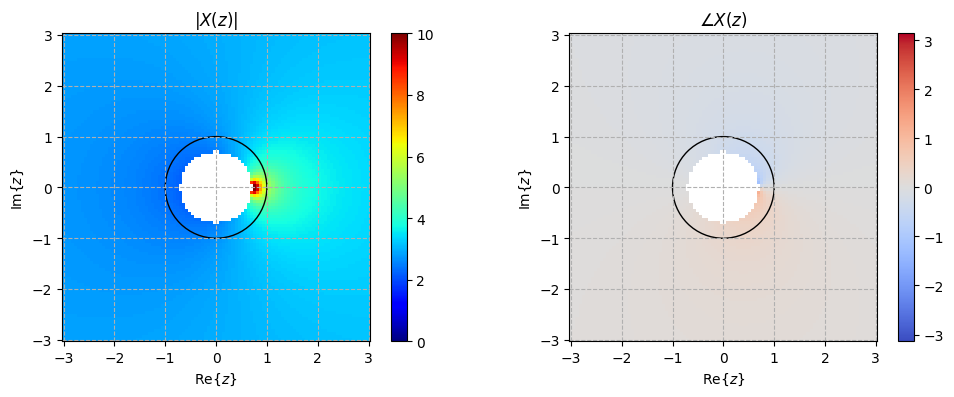

In [177]:

rz = np.linspace(-3,3,100)
iz = np.linspace(-3,3,100)

rr, ii = np.meshgrid(rz,iz)
zz = rr+1j*ii

ROC1 = np.abs(zz) > np.abs(0.3)
ROC2 = np.abs(zz) > np.abs(0.7)
ROC = np.logical_and(ROC1, ROC2)
H_Z =  1/(1-0.7 * (zz**-1)) + 1/(1-0.3 * (zz**-1)) + 1 #Escribimos una expresión
H_Z[~ROC] = np.NaN

#Ploteamos
fig = plt.figure(figsize=[12,4])
(ax1,ax2) = fig.subplots(1,2)
im = ax1.pcolormesh(rz,iz,np.abs(H_Z),cmap=cm.jet,shading='auto')
ax1.set_xlabel('$\mathrm{Re}\{z\}$')
ax1.set_ylabel('$\mathrm{Im}\{z\}$')
ax1.set_title('$|X(z)|$')
ax1.set_aspect(1)
ax1.grid('on',linestyle='--')
im.set_clim(0,10)
fig.colorbar(im,ax=ax1)

circ = plt.Circle((0, 0), radius=1, edgecolor='k', facecolor='None')
ax1.add_artist(circ)

im = ax2.pcolormesh(rz,iz,np.angle(H_Z),cmap=cm.coolwarm,shading='auto')
ax2.set_xlabel('$\mathrm{Re}\{z\}$')
ax2.set_ylabel('$\mathrm{Im}\{z\}$')
ax2.set_title('$\\angle X(z)$')
ax2.set_aspect(1)
ax2.grid('on',linestyle='--')
im.set_clim(-np.pi,np.pi)
fig.colorbar(im,ax=ax2)

circ = plt.Circle((0, 0), radius=1, edgecolor='k', facecolor='None')
ax2.add_artist(circ)

In [178]:
#Calculamos Gz 
z = sym.symbols('z')
k = sym.symbols('k',integer=True)
#Definimos suma
G_z  =  sym.Sum(   (  1 + (-1)**k )*(sym.Rational(12,10) **k)*(z)**(-k) + k*(  sym.Rational(9,10) **k )*(z)**(-k) , (k,0,sym.oo)) #Sumamos 1 por la deltaDirac
G_z = G_z.doit()
print("-----------------Funcion de transferencia G(z) -------------")
G_z_supreme = (G_z.args[1]).args[0][0] +  (G_z.args[0]).args[0][0] + (G_z.args[2]).args[0][0]
sym.simplify(G_z_supreme)

-----------------Funcion de transferencia G(z) -------------


10*z*(500*z**3 - 675*z**2 + 405*z - 324)/(2500*z**4 - 4500*z**3 - 1575*z**2 + 6480*z - 2916)

In [179]:
print(f"------------------ROC de   G(Z) --------------------")
ROCg = sym.And( (G_z.args[1]).args[0][1] ,  (G_z.args[0]).args[0][1] , (G_z.args[2]).args[0][1]) 
ROCg

------------------ROC de   G(Z) --------------------


(1/Abs(z) < 5/6) & (1/Abs(z) < 10/9)

b) Utilizando la funci´on roots de Matlab o la funci´on roots de la librer´ıa numpy en Python, obtenga
los polos y ceros de H(z) y G(z) y graf´ıquelos en el plano z. A partir de los polos, ceros y ROCs,
determine si los sistemas son estables. (1 pto)

In [189]:
from matplotlib import patches
def zplane(b,a,filename=None):
    ax = plt.subplot(111)
    uc = patches.Circle((0,0), radius=1, fill=False, color='black', ls='dashed')
    ax.add_patch(uc)
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1
    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
    markeredgecolor='k', markerfacecolor='g')
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
    markeredgecolor='r', markerfacecolor='r')
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)
    plt.title('Polos y Ceros en el plano z')
    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    return z, p, k


#FUNCION G
sym.simplify(G_z_supreme)

10*z*(500*z**3 - 675*z**2 + 405*z - 324)/(2500*z**4 - 4500*z**3 - 1575*z**2 + 6480*z - 2916)

[1.13847387+0.j        0.10576307+0.7469921j 0.10576307-0.7469921j
 0.        +0.j       ]
[-1.2+0.00000000e+00j  1.2+0.00000000e+00j  0.9+2.10555829e-08j
  0.9-2.10555829e-08j]


TypeError: unsupported operand type(s) for /: 'list' and 'float'

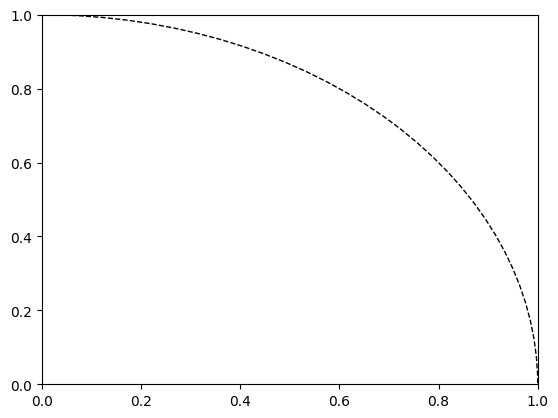

In [193]:
zeros_g = np.roots(np.convolve([10 , 0], [500 , -675 , 405, -324]))
polos_g = np.roots([2500 , -4500 , -1575 , 6480 , -2916])
print(zeros_g)
print(polos_g)
zplane([500.0 , -675.0 , 405.0, -324.0], [2500.0 , -4500.0 , -1575.0 , 6480.0 , -2916.0])

In [185]:
#PARA EL SISTEMA H_Z
sym.simplify(H_Z_supreme)

(300*z**2 - 200*z + 21)/(100*z**2 - 100*z + 21)

In [186]:
zero_h  = np.roots([300 , -200 , 21])
polos_h  = np.roots([100 , -100 , 21])
print(zero_h)
print(polos_h)

[0.53609208 0.13057458]
[0.7 0.3]
